# Week 2

As explained in in class during Lecture 1, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.


### LLM update

<div class="alert alert-block alert-info">
Since we're doing our LLM experiment, I've decided not just to use the blue boxes (like this one), but I have also added comments about how to use (and not to use) the LLMs. <font color="grey">I've put all of those comments in a special grey color - **like the one I'm using here** -  so you can easily spot them</font>.
</div>


## Overview

Today's lecture does a few things.
* First there is an introduction to data visualization incl a little exercise and a video (Part 1). 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots (Part 2,4,5).
* We will also talk a bit about what makes a good plot (Part 3).

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. <font color='grey'>If you don't know how to do that, you may ask your favorite LLM to explain how they work.</font> You can also go "the old way" and use _stackoverflow_. And by the way, never search stack overflow: search Google and choose the relevant stackoverflow topic.

Now, to the exercise:

> *Exercise*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. <font color='grey'>You may also ask an LLM about the string formatting, but make sure it doesn't just give you the answer: Ask how string formatting works, get some examples, and solve your own problem based on that.</font>
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. <font color='grey'>You should be able to do this without any help from LLMs.</font> Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> a, b, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/anscombe.png).) <font color='grey'>For this sub-exercise, try to write the code based on the example I link to. If you get stuck, you may use your LLM to figure it out. But don't ask it for the solution, ask for help with figuring out how to use the functions!</font>
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this). <font color='grey'>Again, try to write down your own thoughts first. Then you can ask your LLM for help after that</font>.
> * <font color='grey'>What did you get out of asking the LLM about the previous sub-question? How did you even go about asking the LLM about the point of the entire set of questions? Reflect on whether or not the LLM helped you get smarter?</font>


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!! <font color='grey'>After reading the wikipedia page, can you learn something from a LLM that's not in the wikipedia page?</font>

<div class="alert alert-block alert-info">
All of the important LLM comments are in gray above.
</div>

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1 

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
data1 = pd.read_csv('../files/data1.tsv', sep='\t', names=['x', 'y'])
data2 = pd.read_csv('../files/data2.tsv', sep='\t', names=['x', 'y'])
data3 = pd.read_csv('../files/data3.tsv', sep='\t', names=['x', 'y'])
data4 = pd.read_csv('../files/data4.tsv', sep='\t', names=['x', 'y'])

data_files = [data1, data2, data3, data4]

In [17]:
for num, data in enumerate(data_files): 
    print("The mean of x in data {} is: {:10.2f}".format(num+1, data['x'].mean()))
    print("The mean of y in data {} is: {:10.2f}".format(num+1, data['y'].mean()))
    print()

The mean of x in data 1 is:       9.00
The mean of y in data 1 is:       7.50

The mean of x in data 2 is:       9.00
The mean of y in data 2 is:       7.50

The mean of x in data 3 is:       9.00
The mean of y in data 3 is:       7.50

The mean of x in data 4 is:       9.00
The mean of y in data 4 is:       7.50



In [19]:
for num, data in enumerate(data_files): 
    print("The variance of x in data {} is: {:10.3f}".format(num+1, np.var(data['x'])))
    print("The variance of y in data {} is: {:10.3f}".format(num+1, np.var(data['y'] )))
    print()

The variance of x in data 1 is:     10.000
The variance of y in data 1 is:      3.752

The variance of x in data 2 is:     10.000
The variance of y in data 2 is:      3.752

The variance of x in data 3 is:     10.000
The variance of y in data 3 is:      3.748

The variance of x in data 4 is:     10.000
The variance of y in data 4 is:      3.748



In [28]:
for num, data in enumerate(data_files): 
    print("The correlation between x and y in data {} is: {:10.3f}".format(num+1, np.corrcoef(data['x'], data['y'])[0,1]))
    print()

The correlation between x and y in data 1 is:      0.816

The correlation between x and y in data 2 is:      0.816

The correlation between x and y in data 3 is:      0.816

The correlation between x and y in data 4 is:      0.817



In [ ]:
for num, data in enumerate(data_files): 
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['x'], data['y'])
    print("The slope of the linear regression model in data {} is: {:10.2f}".format(num+1, slope))
    print("The intercept of the linear regression model in data {} is: {:10.2f}".format(num+1, intercept))
    print()

The slope of the linear regression model in data 1 is:       0.50
The intercept of the linear regression model in data 1 is:       3.00

The slope of the linear regression model in data 2 is:       0.50
The intercept of the linear regression model in data 2 is:       3.00

The slope of the linear regression model in data 3 is:       0.50
The intercept of the linear regression model in data 3 is:       3.00

The slope of the linear regression model in data 4 is:       0.50
The intercept of the linear regression model in data 4 is:       3.00



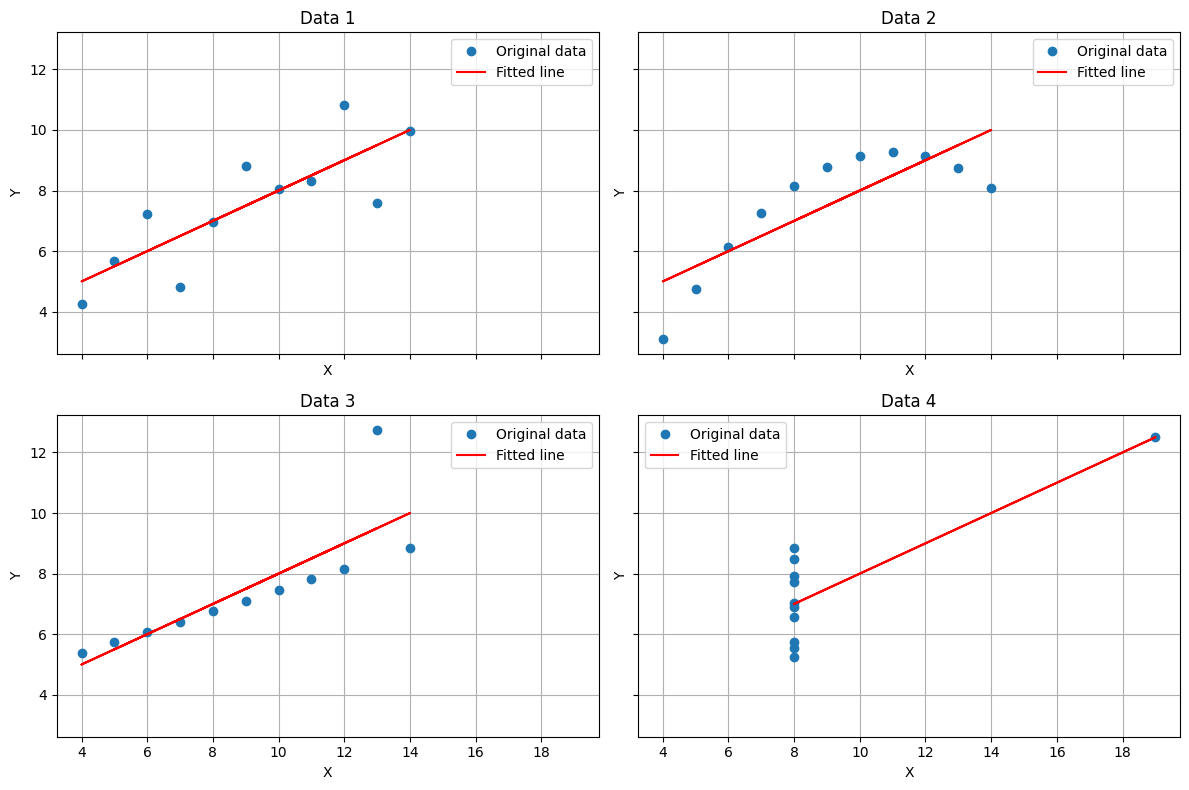

In [27]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 8))
for num, data in enumerate(data_files):
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['x'], data['y'])
    axs[num//2, num%2].plot(data['x'], data['y'], 'o', label='Original data')
    axs[num//2, num%2].plot(data['x'], intercept + slope*data['x'], 'r', label='Fitted line')
    axs[num//2, num%2].set_title('Data {}'.format(num+1))
    axs[num//2, num%2].set_xlabel('X')
    axs[num//2, num%2].set_ylabel('Y')
    axs[num//2, num%2].legend()
    axs[num//2, num%2].grid()
plt.tight_layout()
plt.show()


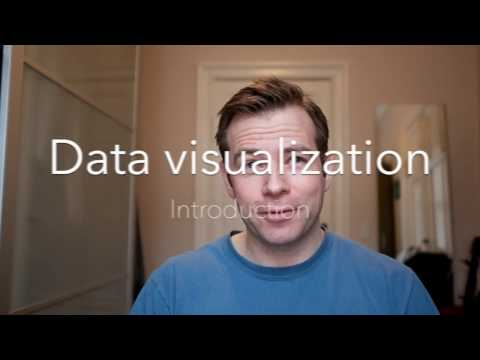

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo('9D2aI30AMhM', width=800, height=450)

> *Excercise:* Questions for the lecture. 
> 
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.
>

<div class="alert alert-block alert-info">
Answer in your own words based on the video, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to get better. It's easy to write a lot with LLMs, but here I want you to keep your answers short and precise.
</div>


## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [31]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.
>
> <font color="grey">It's OK to ask your LLM for help with creating these plots, but</font>
>
> * <font color="grey">Try on your own first,</font>
> * <font color="grey">Then use the LLM ***as a kind of TA*** to help you get your code to work.</font>
>   
> <font color="grey">So don't just ask for answers and pre-written code, then you won't learn how to code & plot in Python - especially the parts about counting the various dates. By actually doing it, you'll start to get a feel for how to slice and dice your dataset according to temporal markers - and that's a key part of data science. You'll be on your way to becoming a true *data whisperer*</font>.

<div class="alert alert-block alert-info">
It's OK to ask your LLM for help with creating these plots, but try on your own first, only after that use the LLM ***as a kind of TA*** to help you get your code to work. Don't just ask for answers and pre-written code, since then you won't learn how to code & plot in Python - especially the parts about counting the various dates. By actually doing it, you'll start to get a feel for how to slice and dice your dataset according to temporal markers - and that's a key part of data science. You'll be on your way to becoming a true data whisperer.
</div>


**Fun little thing**: To further make the point of the exercise in Part 1, check out this video on youtube https://www.youtube.com/watch?v=DbJyPELmhJc  

In [34]:
df_crimes = pd.read_csv('../data/processed_crime_data_focuscrimes.csv')
df_crimes.head(2)

/var/folders/gq/83_83r9n6zbddrn0rsglnqj00000gn/T/ipykernel_97605/3615107705.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crimes = pd.read_csv('../data/processed_crime_data_focuscrimes.csv')


,IncidentNumber,IncidentCode,IncidentCategory,IncidentDescription,IncidentDayOfWeek,IncidentDate,IncidentTime,Resolution,Longitude,Latitude,Location,PoliceDistrict,PdId,Neighborhoods,CurrentPoliceDistricts,CurrentSupervisorDistricts,AnalysisNeighborhood
0,31145463,6374,Larceny/Theft,GRAND THEFT OF PROPERTY,Wednesday,2003-01-01,00:01,NONE,-122.425342,37.792681,POINT (-122.425342309555 37.7926813633502),Northern,3.114546e+12,102.0,4.0,6.0,30.0
1,30001404,16710,Drug/Narcotic,POSSESSION OF NARCOTICS PARAPHERNALIA,Wednesday,2003-01-01,07:54,"ARREST, BOOKED",-122.444034,37.748373,POINT (-122.444033874202 37.7483728693764),Mission,3.000140e+12,51.0,3.0,5.0,22.0


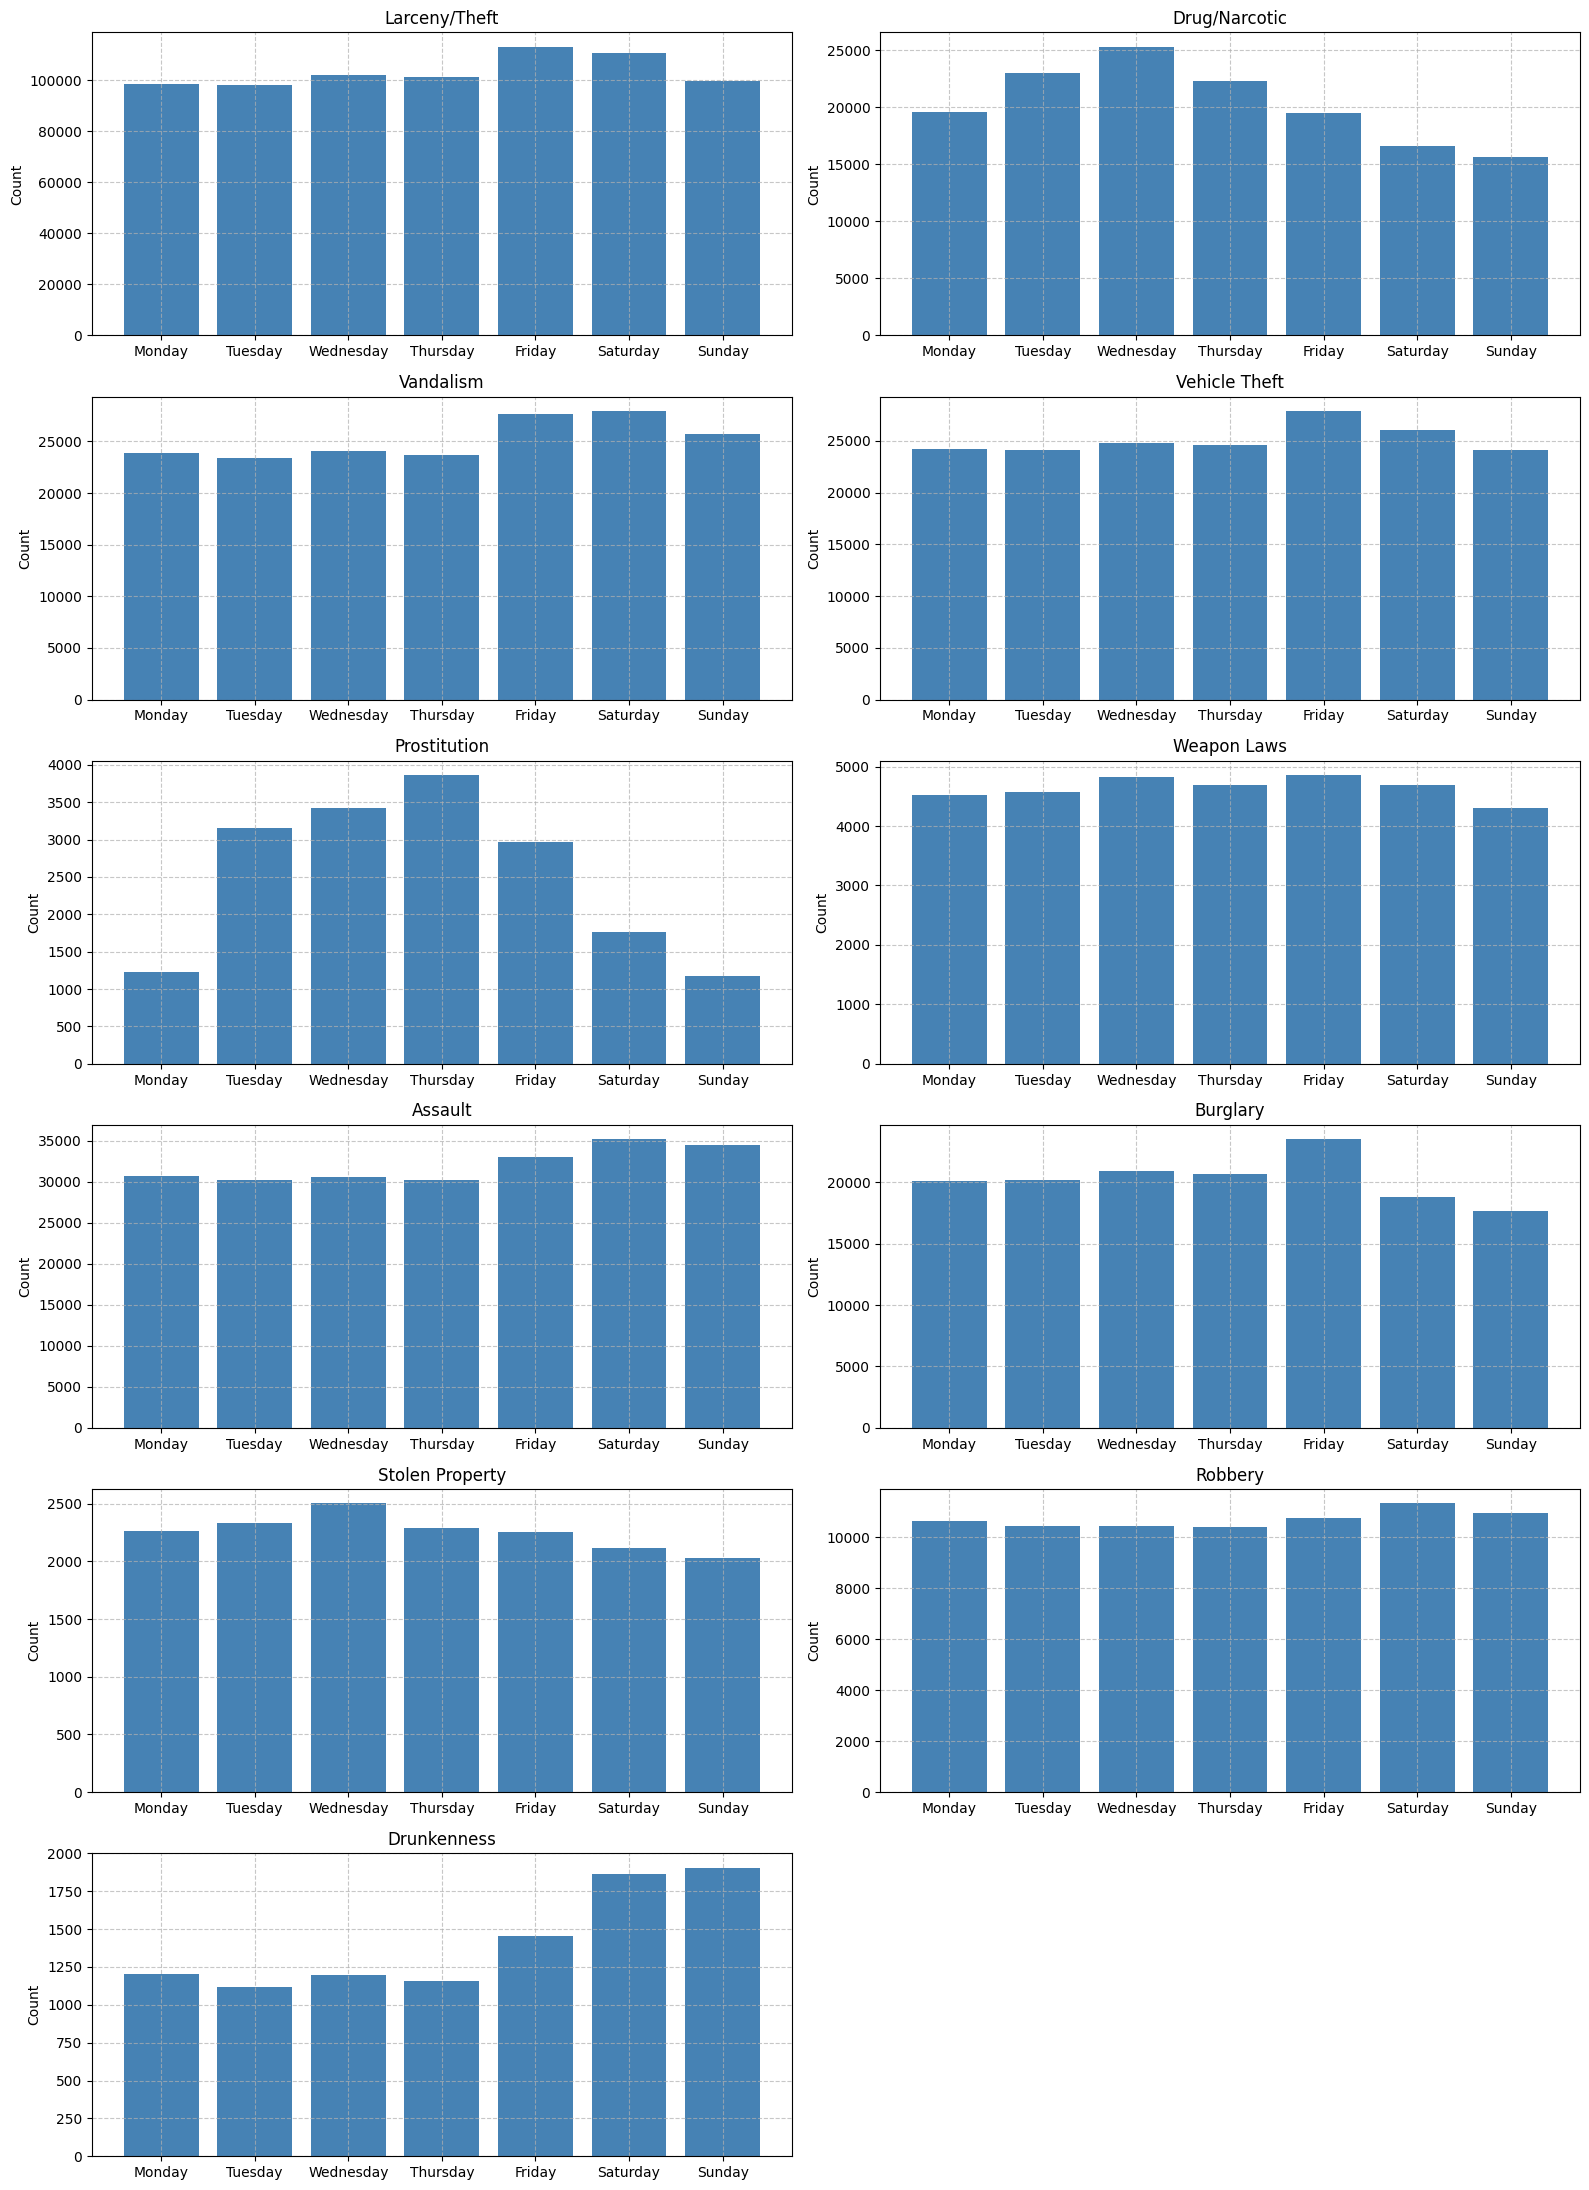

In [37]:
# Get unique IncidentCategory values
incident_categories = df_crimes['IncidentCategory'].unique()
n_categories = len(incident_categories)

# Set up a 2-column plot structure with rows based on the number of categories
fig, axes = plt.subplots(n_categories // 2 + n_categories % 2, 2, figsize=(16, n_categories * 2), sharex=False, sharey=False)
axes = axes.flatten()

# Plot each category
for i, category in enumerate(incident_categories):
    ax = axes[i]
    # Count incidents per day for the current category
    category_data = (
        df_crimes[df_crimes['IncidentCategory'] == category]
        .groupby('IncidentDayOfWeek')
        .size()
        .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)
    )
    ax.bar(category_data.index, category_data.values, color='steelblue')
    ax.set_title(f'{category}', fontsize=12)
    # ax.set_xlabel('Day of the Week', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)

# Remove unused subplots if there are any
for i in range(len(incident_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [39]:
df_crimes['IncidentDate']

0          2003-01-01
1          2003-01-01
2          2003-01-01
3          2003-01-01
4          2003-01-01
              ...    
1734719    2024-12-31
1734720    2024-12-31
1734721    2024-12-31
1734722    2024-12-31
1734723    2024-12-31
Name: IncidentDate, Length: 1734724, dtype: object

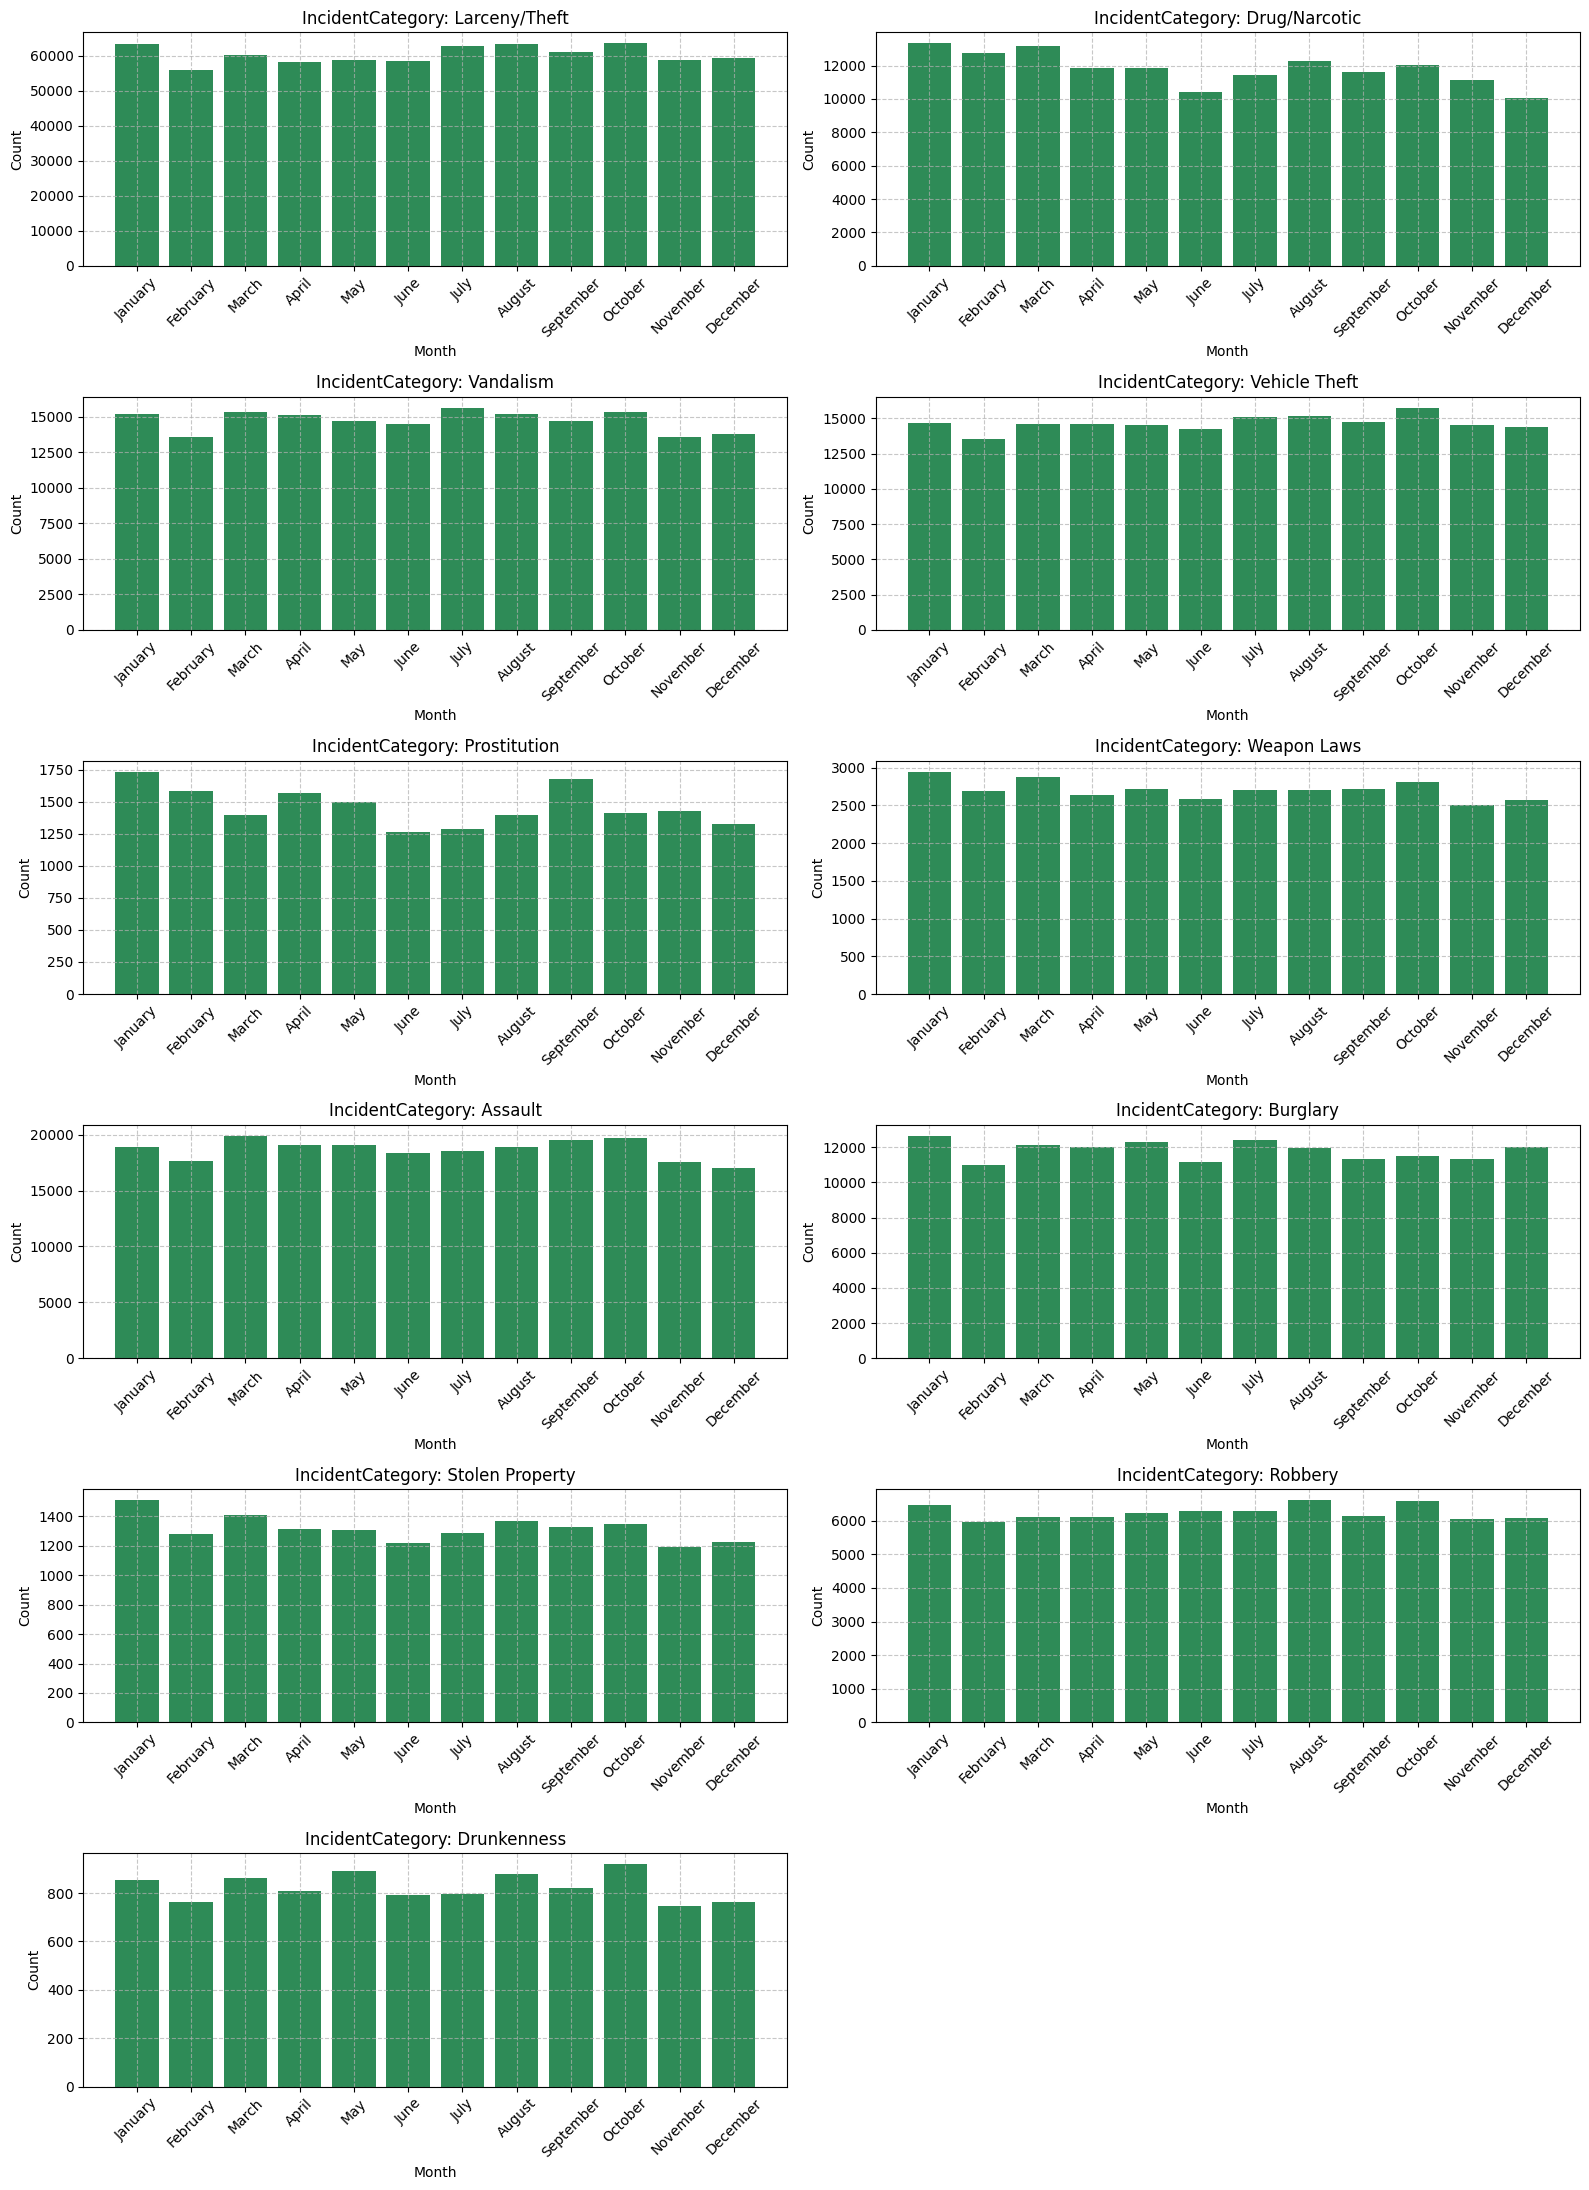

In [41]:
df_crimes['IncidentDate'] = pd.to_datetime(df_crimes['IncidentDate'])
df_crimes['IncidentMonth'] = df_crimes['IncidentDate'].dt.month_name()

incident_categories = df_crimes['IncidentCategory'].unique()
n_categories = len(incident_categories)

fig, axes = plt.subplots(n_categories // 2 + n_categories % 2, 2, figsize=(16, n_categories * 2), sharex=False, sharey=False)
axes = axes.flatten()

for i, category in enumerate(incident_categories):
    ax = axes[i]
    # Count incidents per month for the current category
    category_data = (
        df_crimes[df_crimes['IncidentCategory'] == category]
        .groupby('IncidentMonth')
        .size()
        .reindex([
            'January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'
        ], fill_value=0)
    )
    ax.bar(category_data.index, category_data.values, color='seagreen')
    ax.set_title(f'IncidentCategory: {category}', fontsize=12)
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

# Remove unused subplots if there are any
for i in range(len(incident_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for readability
plt.tight_layout()
plt.show()


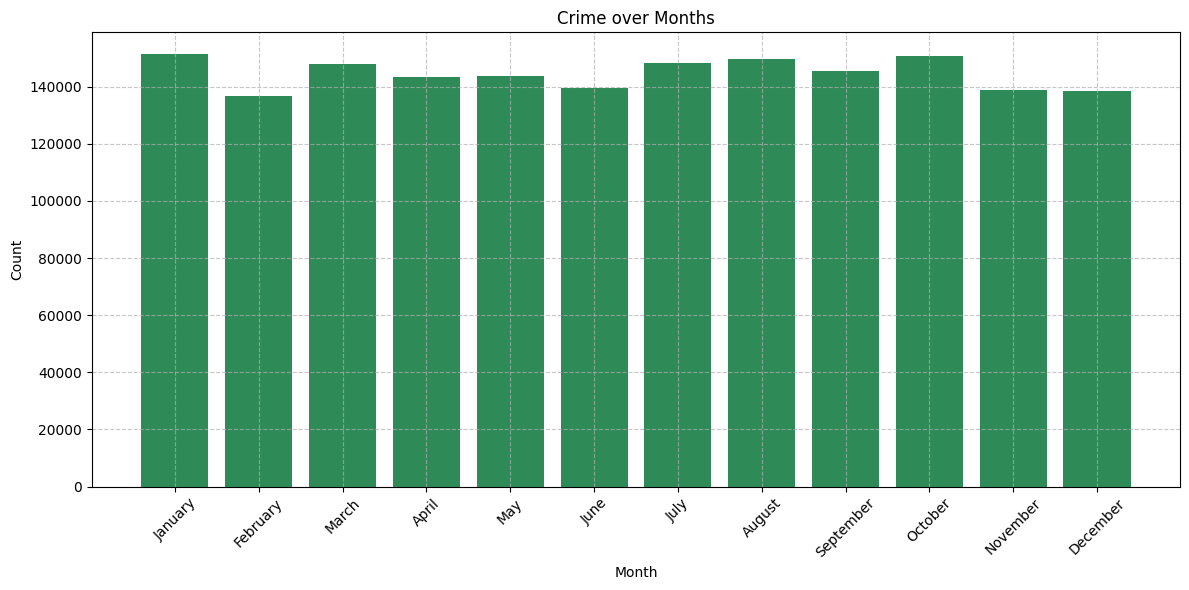

In [48]:
df_crimes['IncidentDate'] = pd.to_datetime(df_crimes['IncidentDate'])
df_crimes['IncidentMonth'] = df_crimes['IncidentDate'].dt.month_name()

fig = plt.figure(figsize=(12, 6))
category_data = (
    df_crimes.groupby('IncidentMonth')['IncidentCategory']
    .size()
    .reindex([
        'January', 'February', 'March', 'April', 'May', 'June', 
        'July', 'August', 'September', 'October', 'November', 'December'
    ], fill_value=0)
)
plt.bar(category_data.index, category_data.values, color='seagreen')
plt.title(f'Crime over Months', fontsize=12)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout for readability
plt.tight_layout()
plt.show()


/var/folders/gq/83_83r9n6zbddrn0rsglnqj00000gn/T/ipykernel_97605/2098233688.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crimes['IncidentHour'] = pd.to_datetime(df_crimes['IncidentTime']).dt.hour


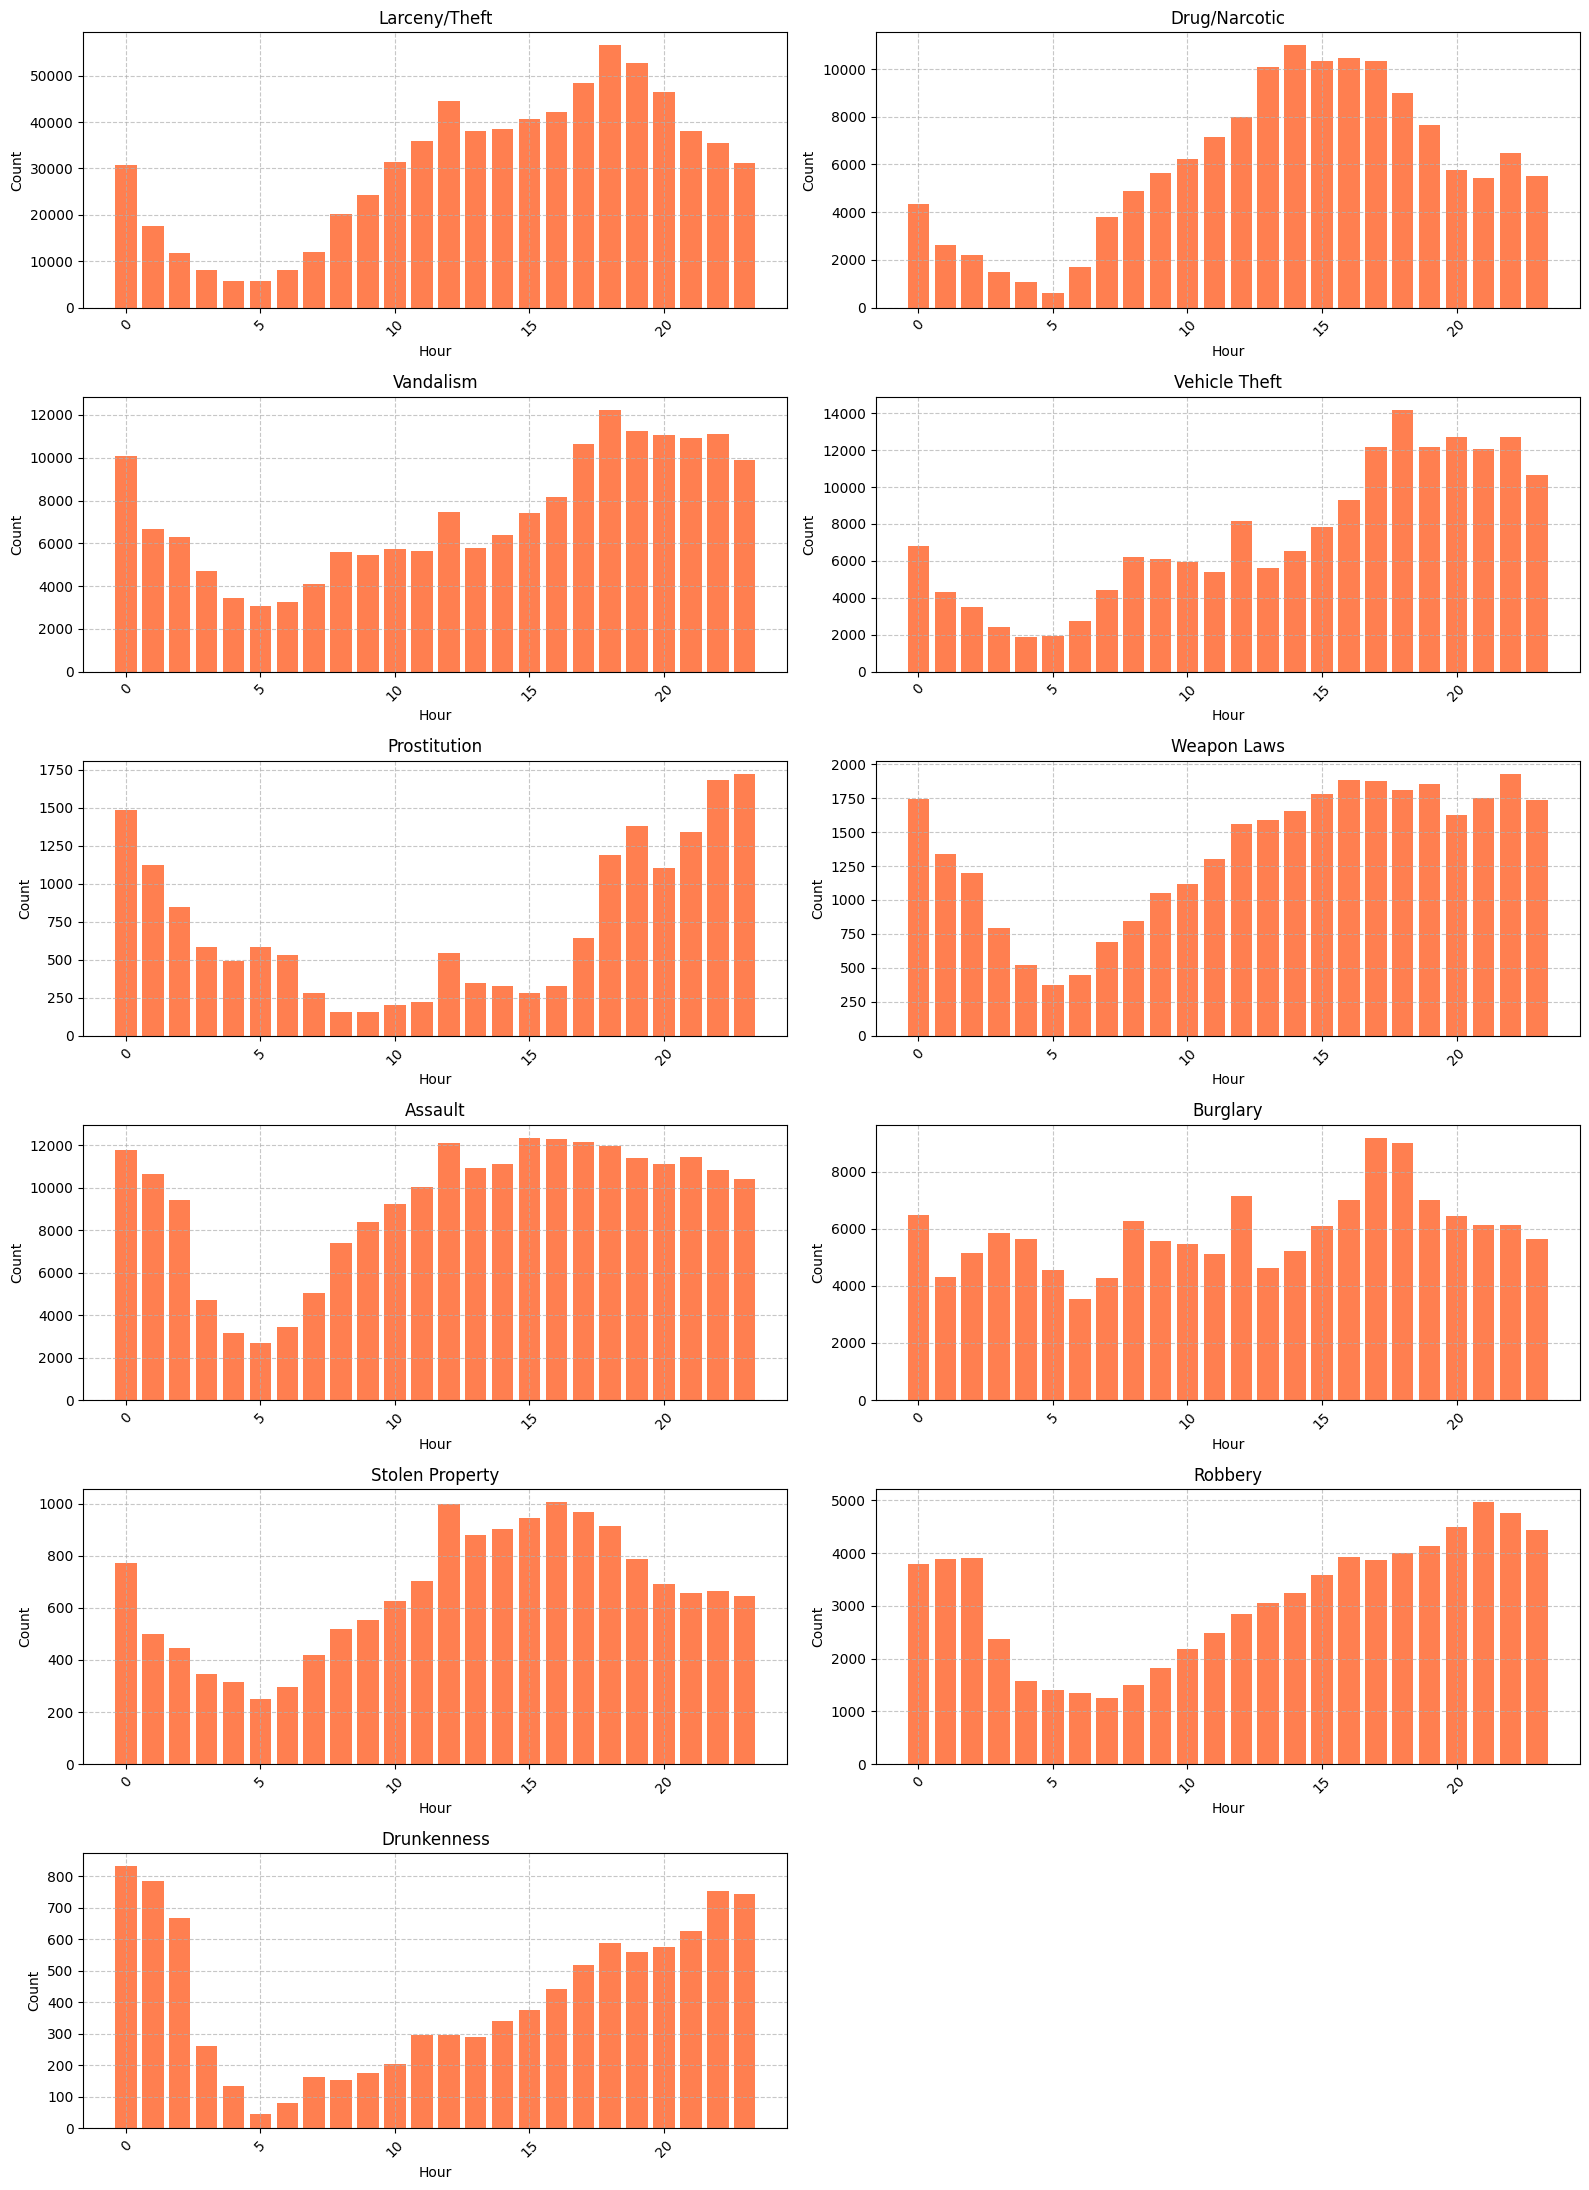

In [59]:
df_crimes['IncidentHour'] = pd.to_datetime(df_crimes['IncidentTime']).dt.hour

incident_categories = df_crimes['IncidentCategory'].unique()
n_categories = len(incident_categories)

fig, axes = plt.subplots(n_categories // 2 + n_categories % 2, 2, figsize=(16, n_categories * 2), sharex=False, sharey=False)
axes = axes.flatten()

for i, category in enumerate(incident_categories):
    ax = axes[i]
    category_data = (
        df_crimes[df_crimes['IncidentCategory'] == category]
        .groupby('IncidentHour')
        .size()
    )
    ax.bar(category_data.index, category_data.values, color='coral')
    ax.set_title(f'{category}', fontsize=12)
    ax.set_xlabel('Hour', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.7)

# Remove unused subplots if there are any
for i in range(len(incident_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for readability
plt.tight_layout()
plt.show()


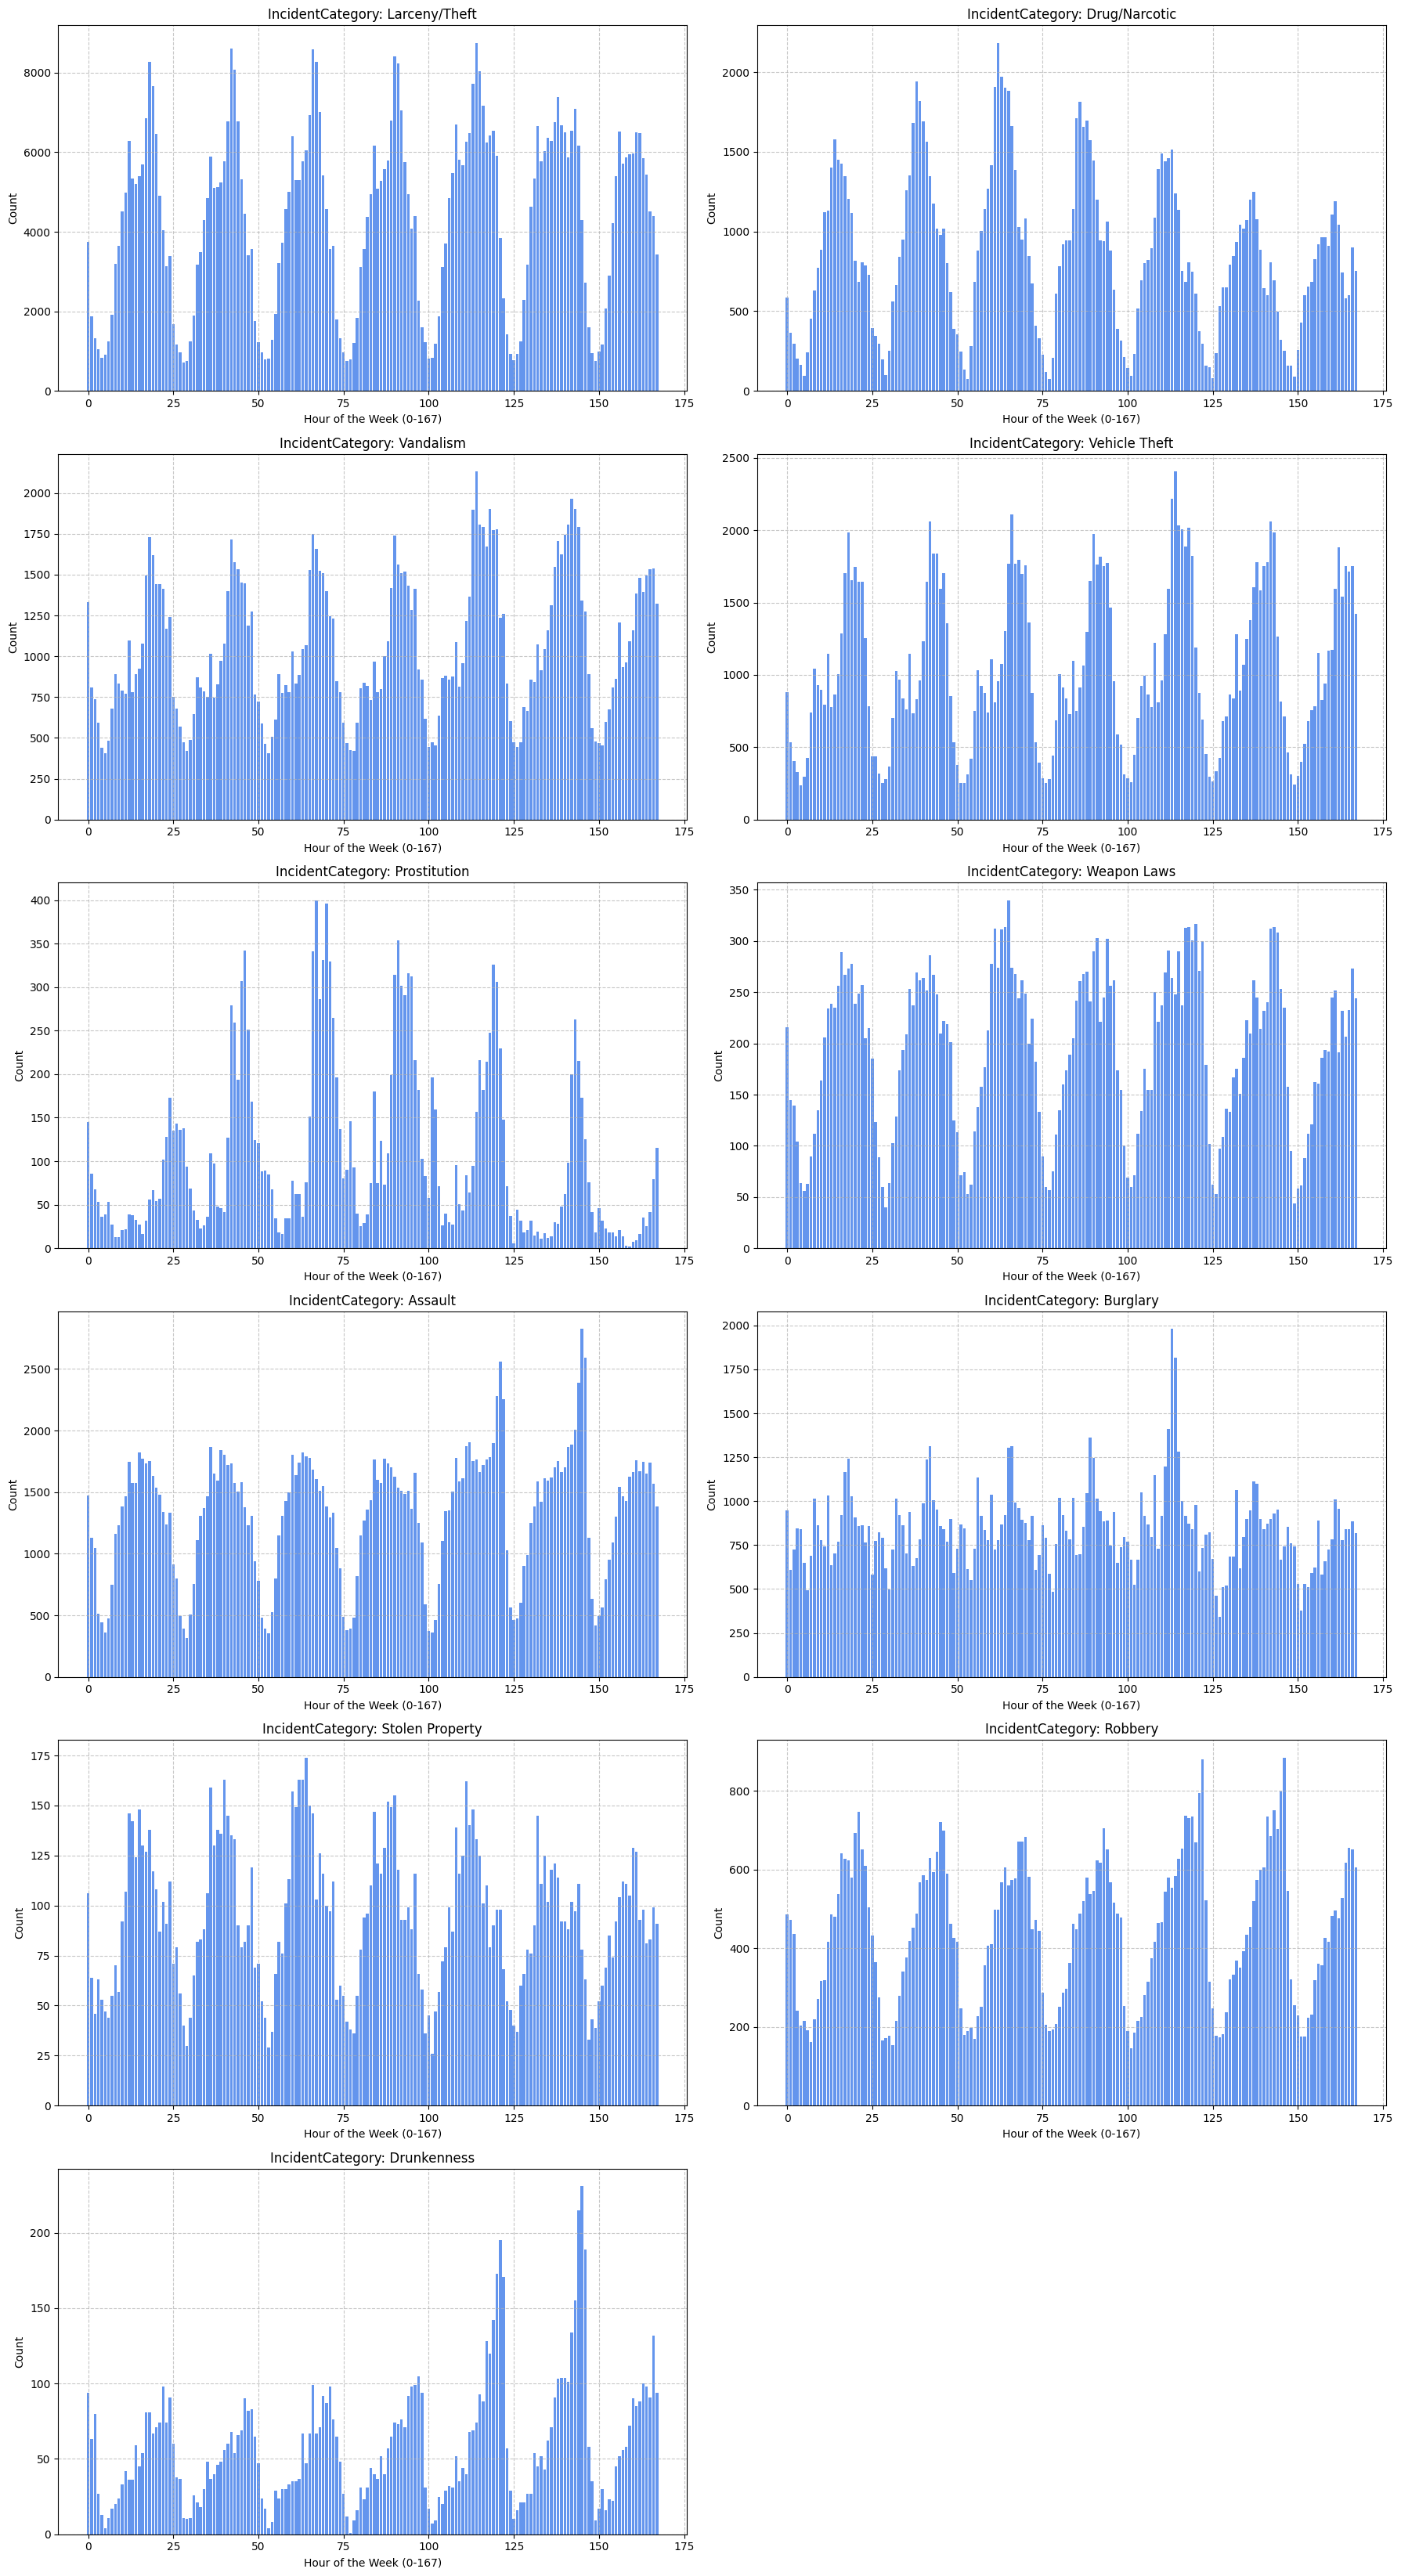

In [70]:
df_crimes['IncidentDate'] = pd.to_datetime(df_crimes['IncidentDate'])
df_crimes['HourOfWeek'] = (df_crimes['IncidentDate'].dt.dayofweek * 24) + df_crimes['IncidentHour']

# Get unique IncidentCategory values
incident_categories = df_crimes['IncidentCategory'].unique()
n_categories = len(incident_categories)

# Set up a 2-column plot structure with rows based on the number of categories
fig, axes = plt.subplots(n_categories // 2 + n_categories % 2, 2, figsize=(18, n_categories * 3), sharex=False, sharey=False)
axes = axes.flatten()

# Plot each category
for i, category in enumerate(incident_categories):
    ax = axes[i]
    # Count incidents per hour of the week for the current category
    category_data = (
        df_crimes[df_crimes['IncidentCategory'] == category]
        .groupby('HourOfWeek')
        .size()
        .reindex(range(168), fill_value=0)  # Ensure all 168 hours are represented
    )
    ax.bar(category_data.index, category_data.values, color='cornflowerblue')
    ax.set_title(f'IncidentCategory: {category}', fontsize=12)
    ax.set_xlabel('Hour of the Week (0-167)', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)

# Remove unused subplots if there are any
for i in range(len(incident_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for readability
plt.tight_layout()
plt.show()


# Part 3: Creating nice plots

Ok. There's a lot of barcharts today. We need them ... they are a fantastic tool for data exploration. But it can get monotonous, so let's take a little break to talk about something else before digging deeper with the barcharts.

I want to tell you a bit about how to make nice plots. I do that in the video below

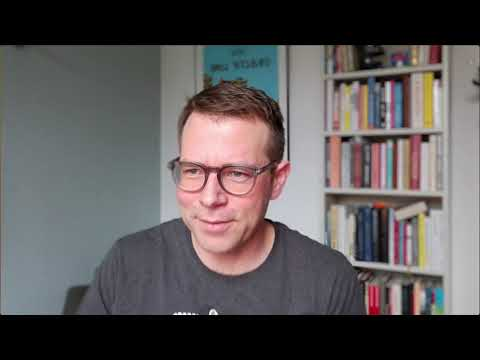

In [4]:
YouTubeVideo('9hIu4pgJXQc', width=800, height=450)

> *Exercise:* Nice plots. 
>
> * Create a list of 10 rules for nice plots based on the video.

<div class="alert alert-block alert-info">
Answer in your own words, do your own research, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to get better.
</div>

- Subplots: 
    - Use subplots instead of many different plots - it is easpecially useful when you have plots similar to each other.
    - Dont have unnecessary white space in the plot.
- Labels: 
    - Always label your axes and give the plot a title.
    - Make sure the labels are readable.
- Axes:
    - Make sure the axes are readable.
    - Make sure the axes are in the right scale.
    - Make sure the axes are showing meaningful values.
    - Be careful with zoom level - make sure the axes are showing the right level of detail.


# Part 4: Exploring other types of plots for temporal data

We continue our mini-break from barcharts by exploring more ways to plot temporal data.

> *Exercise:* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. <font color="grey">For this one, you may use the full power of your LLM! Yes, I'm serious. Go nuts and see if you can get these plots going by fully relying on code generated by your LLM</font>. In case you want to use the *old ways* (that's of course always OK), I've included links and tips. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.
> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.
> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).
> * Time series. Time series is a key functionality of `Pandas`, so here I simply recommend starting by searching your favorite search engine for something like `time series` `pandas`
> * Reflection (<font color="grey">no LLM help here</font>): What did you learn from using LLM's to simply solve everything in this exercise (in contrast to the previous ones).

**Note**: I added this exercise with fewer hints than usual. Normally, I help you break down the problems into small solvable bits. <font color="grey">Since this is a LLM exercise, I haven't done that. But I encourage you to play with figuring out the steps in solving the problem. You can ask the LLM to help you if you like (but perhaps try yourself first and compare to what the LLM suggested).</font> 

This ties in to a bigger picture thing about data science.

*My philosophy for data science is this*: Getting to what you want rarely seems hard once you found your way there, the difficulty comes in breaking down a hard problem into the little steps you need to take to solve your complex problem. In this class, I usually do the breaking down for you and provide you with the steps (that's how you go from nothing to creating complex visualizations of crime-data). But I also want you to learn the breaking-problems-down part. <font color="grey">This is one of the areas where LLMs can be of help -- they excel at breaking down problems into smaller bits -- but if you don't try yourself, you'll never get good at it. So always create your own breakdown first, then see what the computer thinks. Perhaps it can help you get better at it 😀 </font>.

*My approach is always to think*: Even if my task seems impossible, I think: "is there any problem that I ***CAN*** solve that will get me closer to where I want to go?" Once I've solved that part, I'm smarter and I try to think: "Is there a new problem I can solve that'll get me closer knowing what I know now?" And I just keep going. Usually that's enough.

*If that seems too abstract*, a useful goal for you is to use your internet searching skills (old fashioned ones) to figure out how to make each visualization work -- look for examples, tutorials, stack overflow posts, people who have found the same error messages as you, etc, etc. <font color="grey">And of course consulting your LLM</font>.

<div class="alert alert-block alert-info">
Detailed LLM hints in gray in the text itself.
</div>

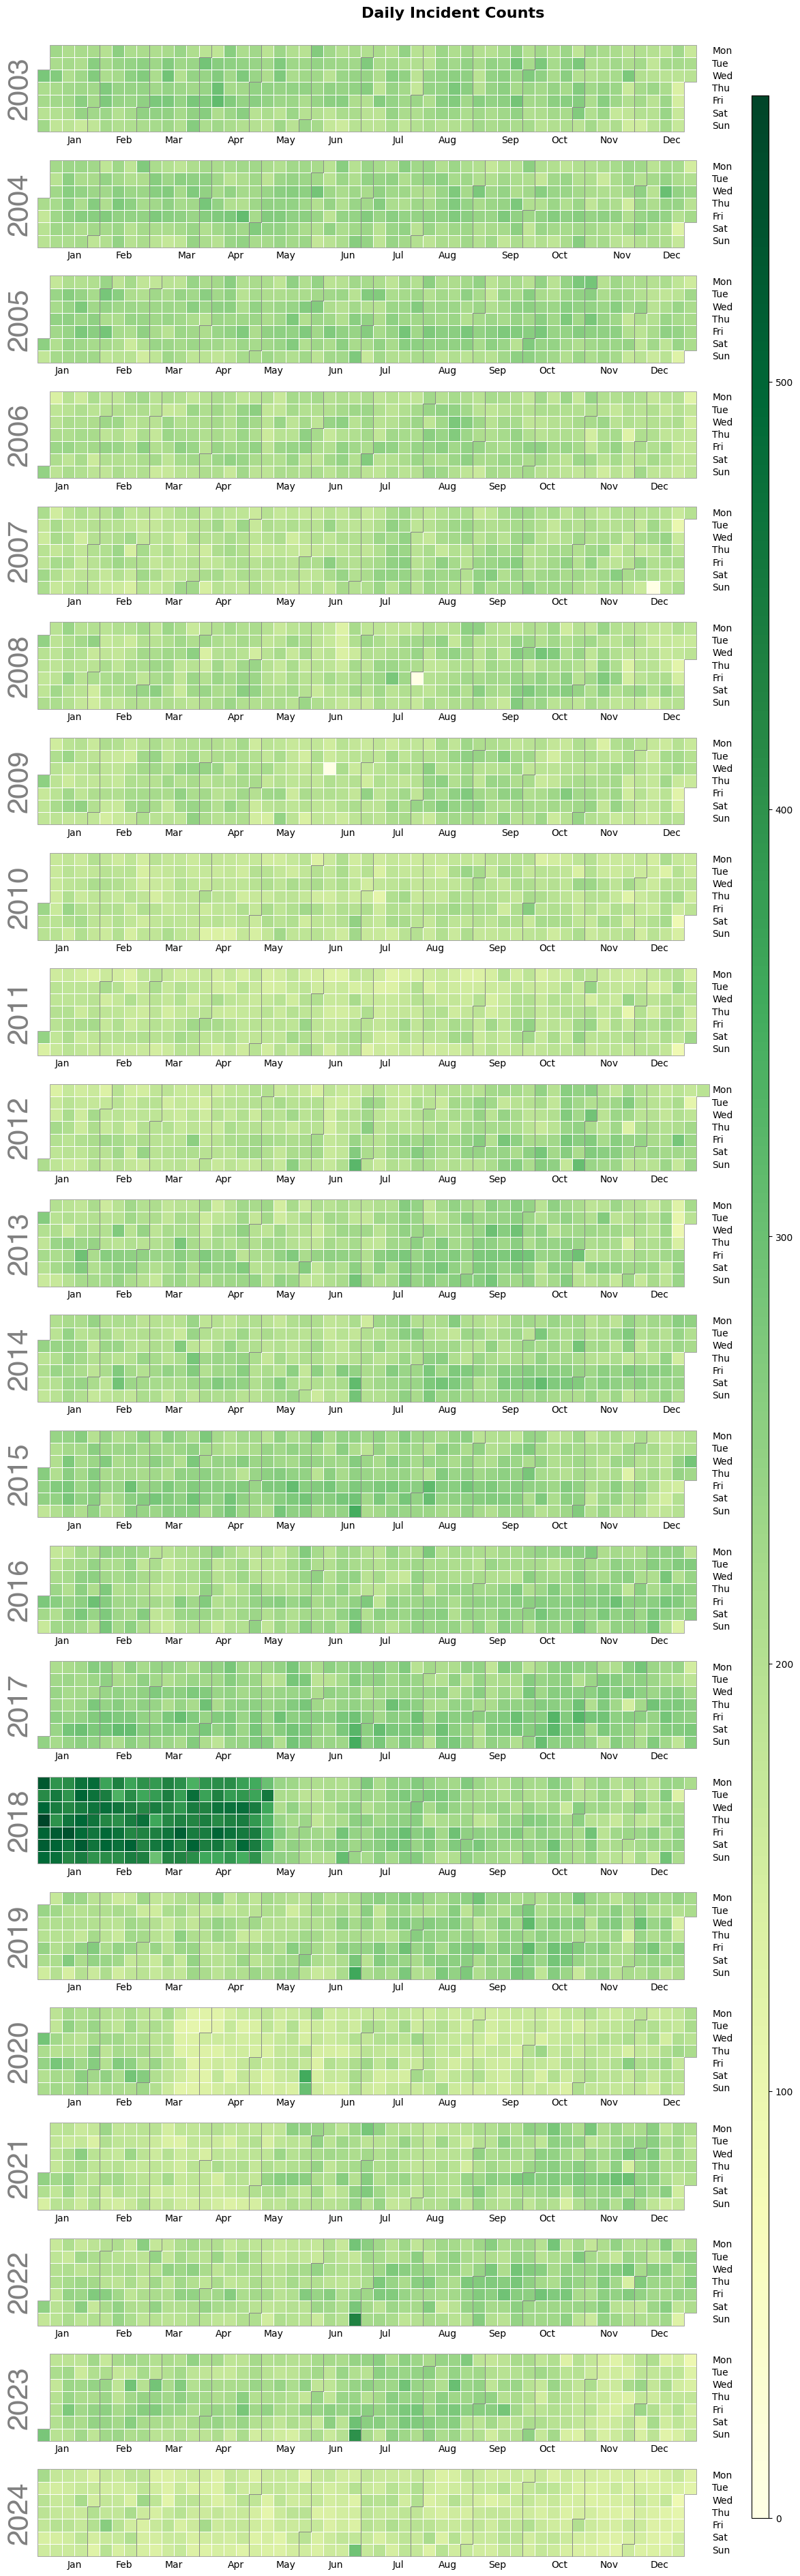

In [80]:
import calplot

df_crimes['IncidentDate'] = pd.to_datetime(df_crimes['IncidentDate'])

# Aggregate data: count incidents per day
daily_counts = df_crimes.groupby('IncidentDate').size()

# Create the calendar plot
calplot.calplot(daily_counts, cmap='YlGn', fillcolor='lightgray', linewidth=0.5)

plt.suptitle('Daily Incident Counts', y=1.01, fontsize=16, fontweight='bold', ha='center')
plt.show()


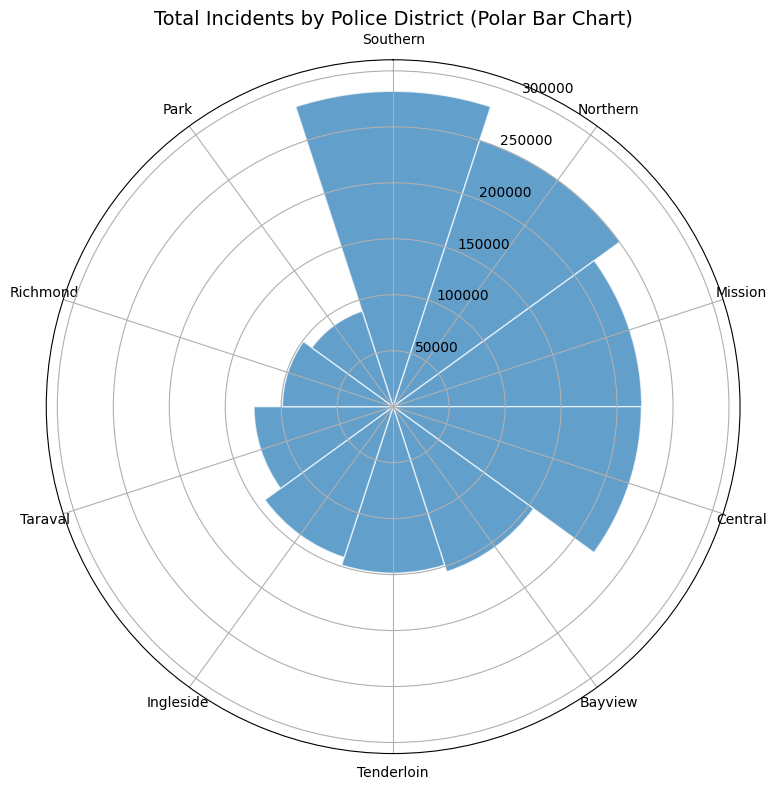

In [86]:
district_counts = df_crimes.groupby('PoliceDistrict').size()
district_counts = district_counts.sort_values(ascending=False)
districts = district_counts.index
counts = district_counts.values
N = len(districts)

# Create the angles for each district
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
width = 2 * np.pi / N  # The width of each bar

# Create the polar plot
fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(10, 8))

bars = ax.bar(angles, counts, width=width, bottom=0, alpha=0.7, edgecolor='white')

# Adjust the polar plot settings
ax.set_theta_zero_location('N')  # 0 degrees at the top (North)
ax.set_theta_direction(-1)       # Go clockwise

# Set the x-ticks to correspond to each police district
ax.set_xticks(angles)
ax.set_xticklabels(districts)

# (Optional) Set a radial maximum a bit above the highest count
ax.set_rmax(counts.max() * 1.1)

# (Optional) Customize radial ticks if you like
# ax.set_rticks([0, 1000, 2000, 3000, 4000])  # Example
# ax.set_rlabel_position(180)                 # Move radial labels to the left side

plt.title("Total Incidents by Police District (Polar Bar Chart)", fontsize=14)
plt.tight_layout()
plt.show()


# Part 5: Back to visualizing patterns in the data

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco. <font color="grey">See if you can do this on your own - the calculations are fairly simple. If you get stuck, you may ask your LLM for advice, but don't use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own.</font>

> *Exercise*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot (based on 2003-2018 data) looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia <font color="grey">(or from your LLM's description of those neighborhoods)</font>?
>    - What neighborhood would you prefer to live in? Explain why?
>    - <font color="grey">BONUS QUESTION. Can you get your LLM to discuss the graphic you created? (E.g. by showing it the image) Did it notice anything you didn't?</font>

<div class="alert alert-block alert-info">
Again, there are detailed LLM hints in gray in the text itself. The key advice is to always see if you can do this on your own - the calculations are fairly simple. Then ask an LLM for advice if you get stuck. Never use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own - that's how you get familar with how matplotlib actually works.
</div>

**Comment**. Notice how much awesome data science (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? 

In [87]:
print("The Police District in SF is: {}".format(df_crimes['PoliceDistrict'].unique()))

The Police District in SF is: ['Northern' 'Mission' 'Southern' 'Ingleside' 'Tenderloin' 'Bayview'
 'Central' 'Park' 'Taraval' 'Richmond']


In [88]:
df_all = pd.read_csv('../data/processed_crime_data.csv')

/var/folders/gq/83_83r9n6zbddrn0rsglnqj00000gn/T/ipykernel_97605/111510037.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('../data/processed_crime_data.csv')


In [92]:
print("The district with the highest number of incidents of all crimes is: {}".format(df_all['PoliceDistrict'].mode()[0]))
print("The district with the highest number of incidents of focus crimes is: {}".format(df_crimes['PoliceDistrict'].mode()[0]))

The district with the highest number of incidents of all crimes is: Southern
The district with the highest number of incidents of focus crimes is: Southern


In [ ]:
df_crimes['IncidentDate'] = pd.to_datetime(df_crimes['IncidentDate'])
df_crimes['HourOfWeek'] = (df_crimes['IncidentDate'].dt.dayofweek * 24) + df_crimes['IncidentHour']

# Get unique IncidentCategory values
incident_categories = df_crimes['IncidentCategory'].unique()
n_categories = len(incident_categories)

# Set up a 2-column plot structure with rows based on the number of categories
fig, axes = plt.subplots(n_categories // 2 + n_categories % 2, 2, figsize=(18, n_categories * 3), sharex=False, sharey=False)
axes = axes.flatten()

# Plot each category
for i, category in enumerate(incident_categories):
    ax = axes[i]
    # Count incidents per hour of the week for the current category
    category_data = (
        df_crimes[df_crimes['IncidentCategory'] == category]
        .groupby('HourOfWeek')
        .size()
        .reindex(range(168), fill_value=0)  # Ensure all 168 hours are represented
    )
    ax.bar(category_data.index, category_data.values, color='cornflowerblue')
    ax.set_title(f'IncidentCategory: {category}', fontsize=12)
    ax.set_xlabel('Hour of the Week (0-167)', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.7)

# Remove unused subplots if there are any
for i in range(len(incident_categories), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for readability
plt.tight_layout()
plt.show()


In [95]:
districts

Index(['Bayview', 'Central', 'Ingleside', 'Mission', 'Northern', 'Park',
       'Richmond', 'Southern', 'Taraval', 'Tenderloin'],
      dtype='object', name='PoliceDistrict')

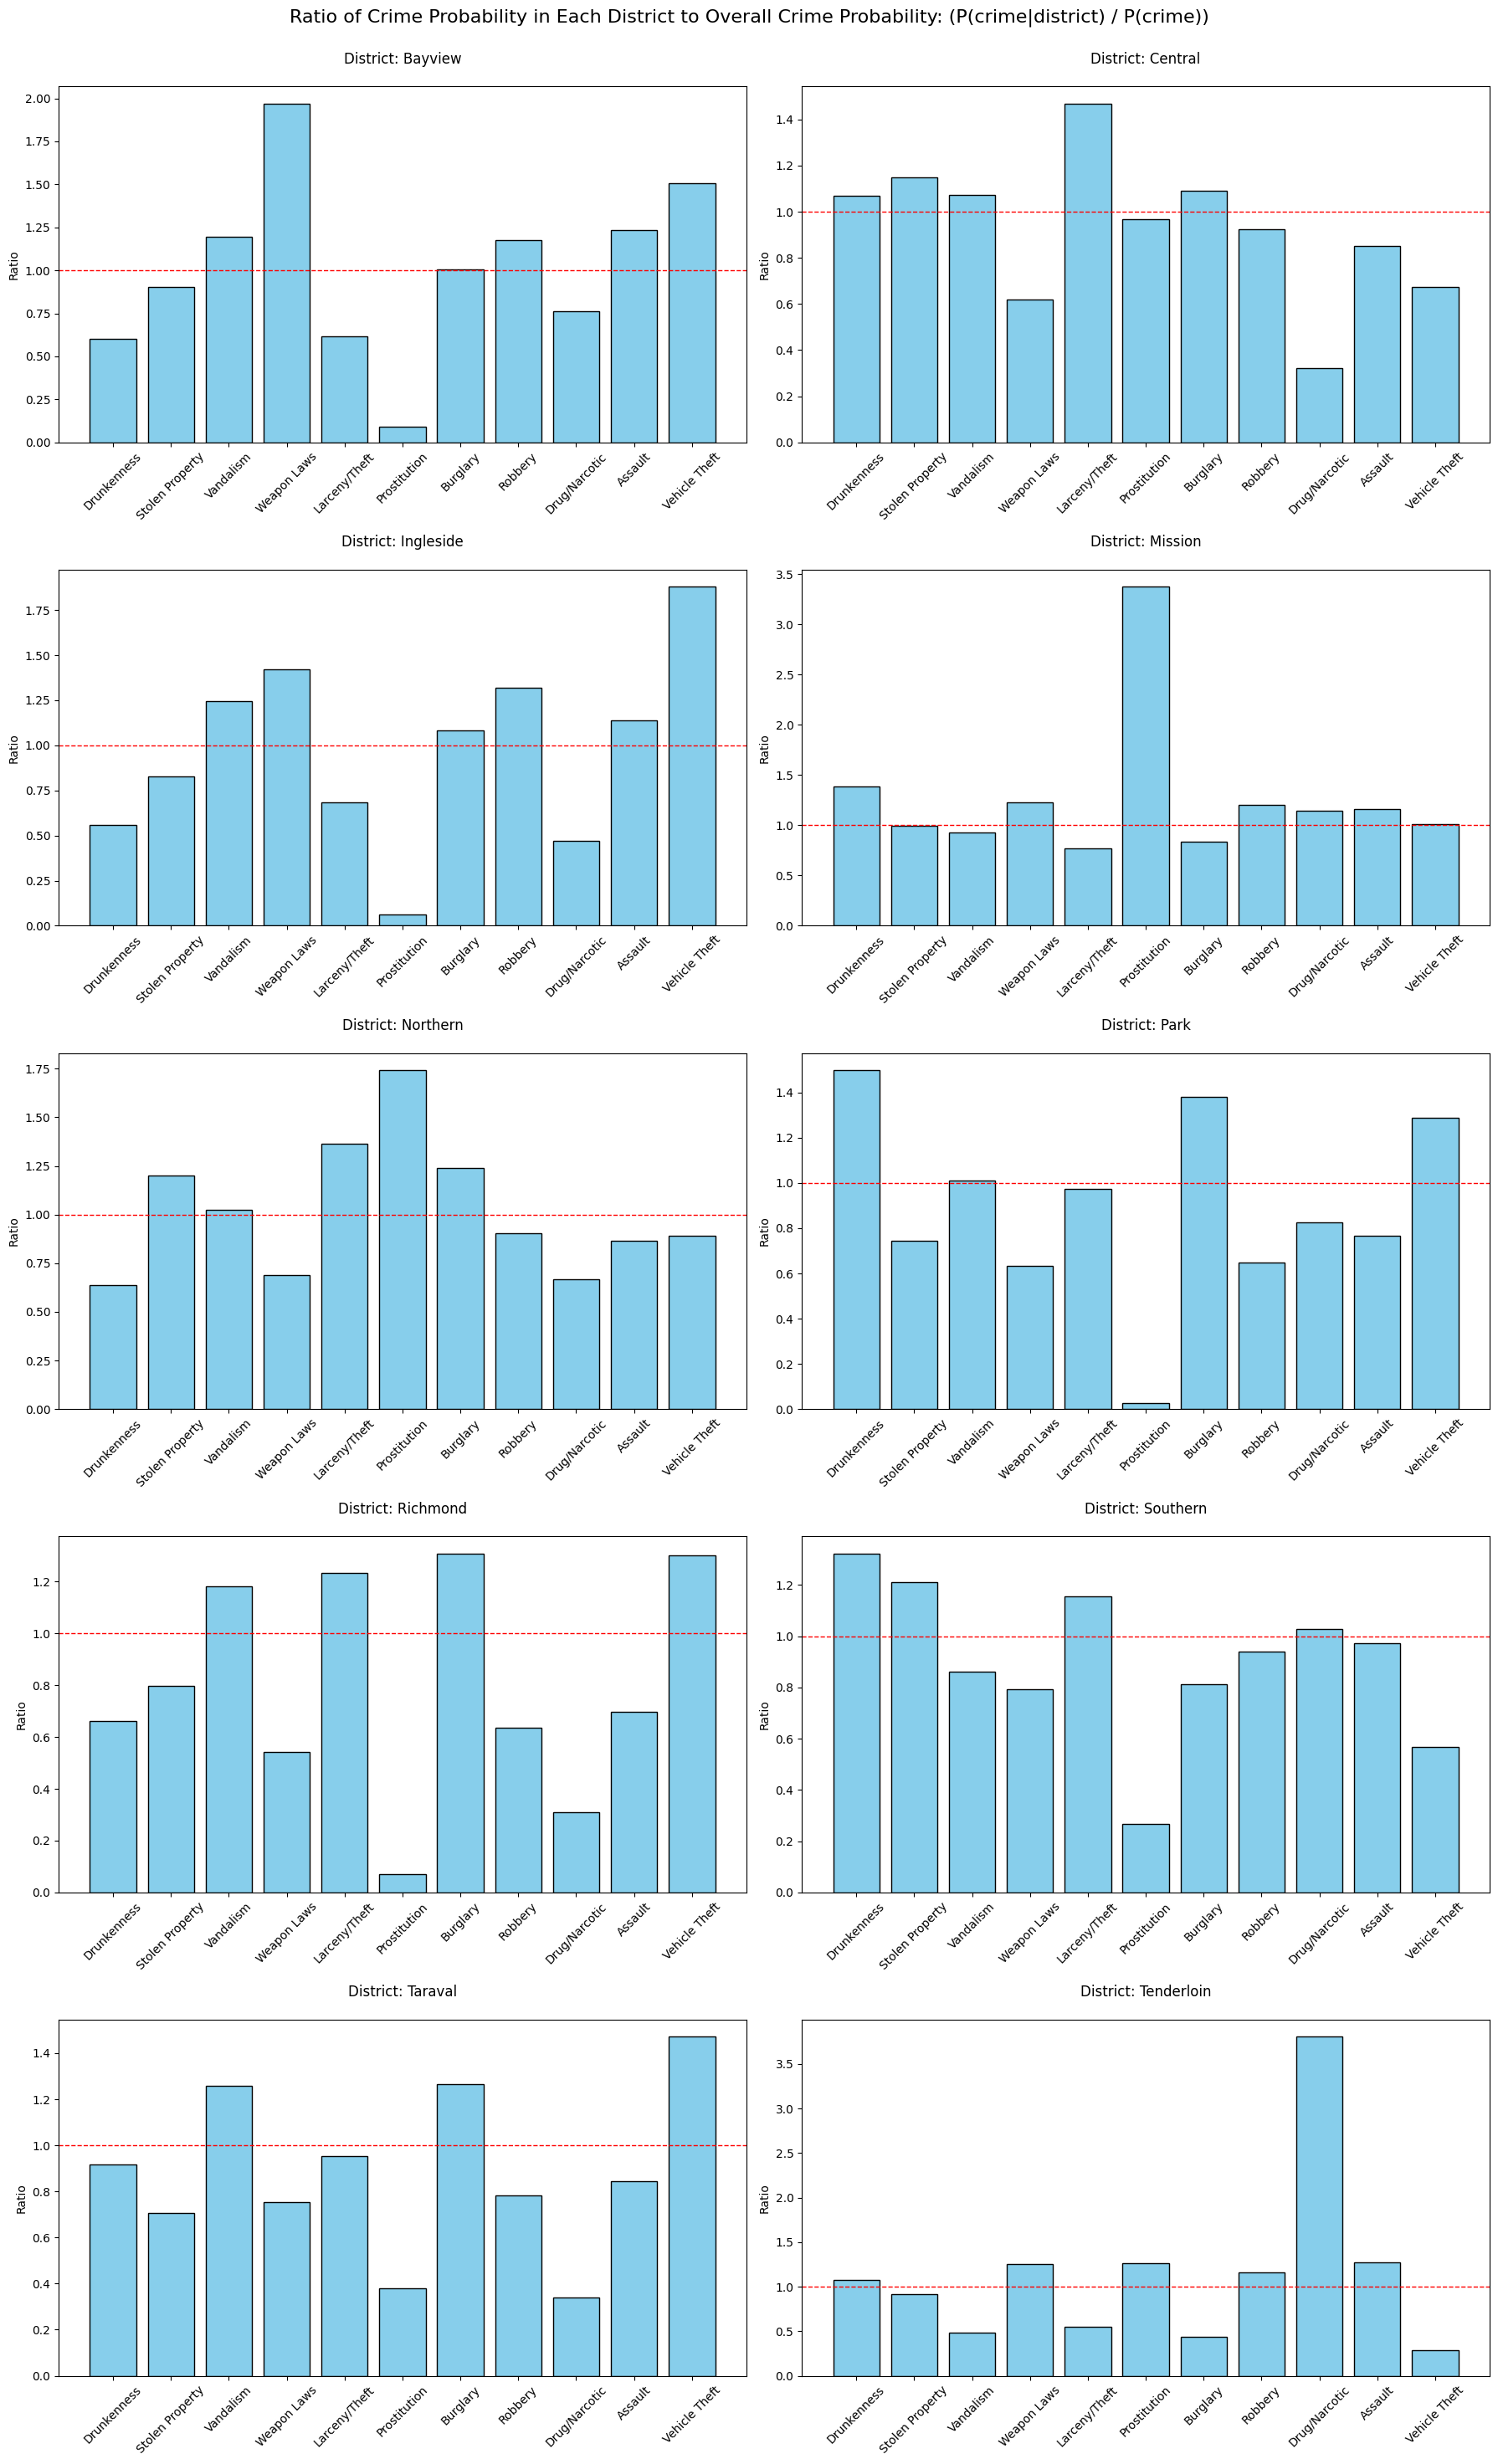

In [110]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])
focuscrimes = set([x.title() for x in focuscrimes])

# --- Step 2: Compute Overall Crime Probabilities P(crime) ---
# Count the number of occurrences for each crime type
crime_total = df_all['IncidentCategory'].value_counts()
p_crime = crime_total / crime_total.sum()

# Filter to focus crimes that actually exist in the data
common_crimes = [crime for crime in focuscrimes if crime in p_crime.index]

# --- Step 3: Compute District-Level Probabilities P(crime|district) ---
# Group by PoliceDistrict and IncidentCategory, then count
crime_by_district = df_all.groupby(['PoliceDistrict', 'IncidentCategory']).size().unstack(fill_value=0)

# For each district, divide by the total crimes in that district to get probabilities
p_crime_given_district = crime_by_district.div(crime_by_district.sum(axis=1), axis=0)

# --- Step 4: Compute the Ratio ---
# For each district, for each focus crime, compute ratio = P(crime|district) / P(crime)
ratio = p_crime_given_district[common_crimes].div(p_crime[common_crimes], axis=1)

# --- Step 5: Plot the Ratios for Each District ---
# We'll create one subplot per police district.
num_districts = ratio.shape[0]
districts = ratio.index

fig, axes = plt.subplots(nrows=num_districts // 2 + num_districts % 2, ncols=2, figsize=(18, num_districts * 3), sharex=False, sharey=False)
fig.suptitle('Ratio of Crime Probability in Each District to Overall Crime Probability: (P(crime|district) / P(crime))', fontsize=16)
axes = axes.flatten()

for i, district in enumerate(districts):
    ax = axes[i]
    # Plot the ratio for each focus crime as a bar chart
    ax.bar(ratio.columns, ratio.loc[district], color='skyblue', edgecolor='black')
    
    # Add a horizontal line at y=1 for reference
    ax.axhline(1, color='red', linestyle='--', linewidth=1)
    
    # Set title and labels
    ax.set_title(f'District: {district}', fontsize=12, pad=20)  # Add padding to the title
    ax.set_ylabel('Ratio')
    ax.tick_params(axis='x', rotation=45)
    
# Remove unused subplots if there are any
for i in range(len(districts), len(axes)):
    fig.delaxes(axes[i])

# Set common x-label
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
